In [ ]:
# Github: https://github.com/thanhliem89dn/introduction-to-machine-learning-supervised-learning/blob/main/supervised-learning-cb.ipynb

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
RANDOM_STATE = 42

csv_path = "/kaggle/input/medical-insurance-cost-prediction/medical_insurance.csv"
df = pd.read_csv(csv_path)
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

In [3]:
# person_id: A unique identifier assigned to each individual in the dataset.
# age: Age of the individual (in years).
# sex: Biological sex of the individual ("male", "female", etc.).
# region: Geographic region where the individual resides.
# urban_rural: Whether the individual lives in an urban or rural area.
# income: Annual income of the individual.
# education: Highest level of education attained by the individual.
# marital_status: Marital status (e.g., "single", "married", "divorced").
# employment_status: Employment status (e.g., "employed", "unemployed", "retired").
# household_size: Number of people living in the individual’s household.
# dependents: Number of dependents (children or others financially reliant).
# bmi: Body Mass Index (BMI), a measure of body fat based on height and weight.
# smoker: Indicates whether the individual is a smoker.
# alcohol_freq: Frequency of alcohol consumption (e.g., "never", "weekly", "occasionally").
# visits_last_year: Number of healthcare visits the individual made in the last year.
# hospitalizations_last_3yrs: Number of times hospitalized in the last three years.
# days_hospitalized_last_3yrs: Total number of days the individual spent in the hospital in the last three years.
# medication_count: Number of medications the individual is currently taking.
# systolic_bp: Systolic blood pressure level (top number).
# diastolic_bp: Diastolic blood pressure level (bottom number).
# ldl: LDL cholesterol level (often referred to as "bad" cholesterol).
# hba1c: Hemoglobin A1C level, used to measure average blood sugar levels over the past 2-3 months.
# plan_type: Type/category of the health insurance plan.
# network_tier: Tier of the health insurance network (e.g., "basic", "premium", "mid").
# deductible: Amount the individual must pay out-of-pocket before insurance coverage kicks in.
# copay: Fixed amount paid by the individual for a covered medical service.
# policy_term_years: Number of years the insurance policy has been in effect.
# policy_changes_last_2yrs: Number of times the individual changed or updated their policy in the last two years.
# provider_quality: A score or rating representing the quality of the healthcare providers used.
# risk_score: A calculated score indicating medical or insurance risk based on various factors.
# annual_medical_cost: Total medical expenses (not necessarily covered by insurance) incurred annually.
# annual_premium: Annual amount paid for the insurance plan.
# monthly_premium: Monthly breakdown of the insurance premium.
# claims_count: Number of insurance claims filed by the individual.
# avg_claim_amount: Average amount of money per claim.
# total_claims_paid: Total amount paid by the insurance provider on the individual’s claims.
# chronic_count: Number of chronic conditions diagnosed in the individual.
# hypertension: Indicates whether the individual has been diagnosed with hypertension (1 = yes, 0 = no).
# diabetes: Indicates whether the individual has diabetes (1 = yes, 0 = no).
# asthma: Indicates asthma diagnosis (1 = yes, 0 = no).
# copd: Indicates chronic obstructive pulmonary disease diagnosis (1 = yes, 0 = no).
# cardiovascular_disease: Indicates cardiovascular disease (1 = yes, 0 = no).
# cancer_history: Indicates whether the individual has a history of cancer (1 = yes, 0 = no).
# kidney_disease: Indicates kidney disease (1 = yes, 0 = no).
# liver_disease: Indicates liver disease (1 = yes, 0 = no).
# arthritis: Indicates arthritis (1 = yes, 0 = no).
# mental_health: Indicates presence of a mental health condition (1 = yes, 0 = no).
# proc_imaging_count: Number of medical imaging procedures (e.g., X-Ray, MRI) undergone.
# proc_surgery_count: Number of surgeries undergone.
# proc_physio_count: Number of physical therapy sessions attended.
# proc_consult_count: Number of consultation appointments the individual had.
# proc_lab_count: Number of lab procedures/tests conducted.
# is_high_risk: Indicates if the person is considered high-risk by the insurer (1 = yes, 0 = no).
# had_major_procedure: Indicates whether the individual had a major medical procedure (1 = yes, 0 = no).

### In this research, we will **classify individuals by risk level** 

In [ ]:
In this research, we will classify individuals by risk level

In [25]:
# alcohol_freq                   30.083
# Intend to remove the column that has too many missing values, but alcohol_freq is important for predicting Risk Level, so we will fill the missing value with an unknown value. 
# If the result is not good, we will remove the record with unknown values.
df['alcohol_freq'].fillna('unknown', inplace=True)
unique_alcohol_freq = df['alcohol_freq'].unique().tolist()
print("unique_alcohol_freq: ", unique_alcohol_freq)
unique_alcohol_freq_count = df['alcohol_freq'].value_counts()
print(unique_alcohol_freq_count)

unique_alcohol_freq:  ['unknown', 'Weekly', 'Daily', 'Occasional']
alcohol_freq
Occasional    45078
unknown       30083
Weekly        19833
Daily          5006
Name: count, dtype: int64


In [26]:
# Drop useless columns
drop_cols = [
    'person_id',        # not features
    'risk_score'
]
df = df.drop(columns=drop_cols)

In [27]:
# Handle category columns
cat_cols = df.select_dtypes('object').columns
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("Unique values:", df[col].unique().tolist())
    print("Value counts:")
    print(df[col].value_counts())


Column: sex
Number of unique values: 3
Unique values: ['Female', 'Male', 'Other']
Value counts:
sex
Female    49193
Male      48794
Other      2013
Name: count, dtype: int64

Column: region
Number of unique values: 5
Unique values: ['North', 'Central', 'West', 'South', 'East']
Value counts:
region
South      28029
North      22027
East       19984
West       17879
Central    12081
Name: count, dtype: int64

Column: urban_rural
Number of unique values: 3
Unique values: ['Suburban', 'Urban', 'Rural']
Value counts:
urban_rural
Urban       60019
Suburban    25021
Rural       14960
Name: count, dtype: int64

Column: education
Number of unique values: 6
Unique values: ['Doctorate', 'No HS', 'HS', 'Some College', 'Masters', 'Bachelors']
Value counts:
education
Bachelors       27996
Some College    25112
HS              24827
Masters         13987
No HS            5120
Doctorate        2958
Name: count, dtype: int64

Column: marital_status
Number of unique values: 4
Unique values: ['Married',

In [28]:
for col in cat_cols:
    df[col] = df[col].astype('category') 
    df[col] = df[col].cat.codes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  int64  
 1   sex                          100000 non-null  int8   
 2   region                       100000 non-null  int8   
 3   urban_rural                  100000 non-null  int8   
 4   income                       100000 non-null  float64
 5   education                    100000 non-null  int8   
 6   marital_status               100000 non-null  int8   
 7   employment_status            100000 non-null  int8   
 8   household_size               100000 non-null  int64  
 9   dependents                   100000 non-null  int64  
 10  bmi                          100000 non-null  float64
 11  smoker                       100000 non-null  int8   
 12  alcohol_freq                 100000 non-null  int8   
 13  

In [29]:
pd.set_option('display.max_columns', None)
print(df.describe())
# Don't see any suspicious data

                 age            sex         region    urban_rural  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       47.521500       0.528200       2.196410       1.450590   
std        15.988752       0.538022       1.280613       0.739435   
min         0.000000       0.000000       0.000000       0.000000   
25%        37.000000       0.000000       1.000000       1.000000   
50%        48.000000       1.000000       2.000000       2.000000   
75%        58.000000       1.000000       3.000000       2.000000   
max       100.000000       2.000000       4.000000       2.000000   

             income      education  marital_status  employment_status  \
count  1.000000e+05  100000.000000   100000.000000       100000.00000   
mean   4.987390e+04       2.406130        1.368290            0.82537   
std    4.680021e+04       1.894535        0.673288            1.07659   
min    1.100000e+03       0.000000        0.000000            0.00000   
25%    2.1100

In [30]:
# Feature Engineering
# Focus on combining the same meaning features to reduce the number of features
# df["chronic_conditions"] = df[["hypertension", "diabetes", "asthma", "copd", "cardiovascular_disease",
# "cancer_history", "kidney_disease", "liver_disease", "arthritis", "mental_health"]].sum(axis=1)

drop_cols = ["hypertension", "diabetes", "asthma", "copd", "cardiovascular_disease",
"cancer_history", "kidney_disease", "liver_disease", "arthritis", "mental_health"]
df = df.drop(columns=drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  int64  
 1   sex                          100000 non-null  int8   
 2   region                       100000 non-null  int8   
 3   urban_rural                  100000 non-null  int8   
 4   income                       100000 non-null  float64
 5   education                    100000 non-null  int8   
 6   marital_status               100000 non-null  int8   
 7   employment_status            100000 non-null  int8   
 8   household_size               100000 non-null  int64  
 9   dependents                   100000 non-null  int64  
 10  bmi                          100000 non-null  float64
 11  smoker                       100000 non-null  int8   
 12  alcohol_freq                 100000 non-null  int8   
 13  

In [31]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scale_cols = [
'age', 'income', 'bmi', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 'deductible', 'copay',
'annual_medical_cost', 'annual_premium', 'monthly_premium','avg_claim_amount', 'total_claims_paid',
]

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

print(df.describe(include='all'))

                age            sex         region    urban_rural  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean  -2.046363e-16       0.528200       2.196410       1.450590   
std    1.000005e+00       0.538022       1.280613       0.739435   
min   -2.972198e+00       0.000000       0.000000       0.000000   
25%   -6.580596e-01       0.000000       1.000000       1.000000   
50%    2.992744e-02       1.000000       2.000000       2.000000   
75%    6.553702e-01       1.000000       3.000000       2.000000   
max    3.282230e+00       2.000000       4.000000       2.000000   

             income      education  marital_status  employment_status  \
count  1.000000e+05  100000.000000   100000.000000       100000.00000   
mean   2.216893e-17       2.406130        1.368290            0.82537   
std    1.000005e+00       1.894535        0.673288            1.07659   
min   -1.042178e+00       0.000000        0.000000            0.00000   
25%   -6.148273e-01   

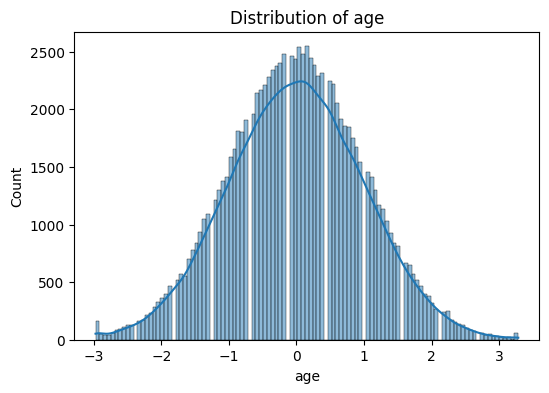

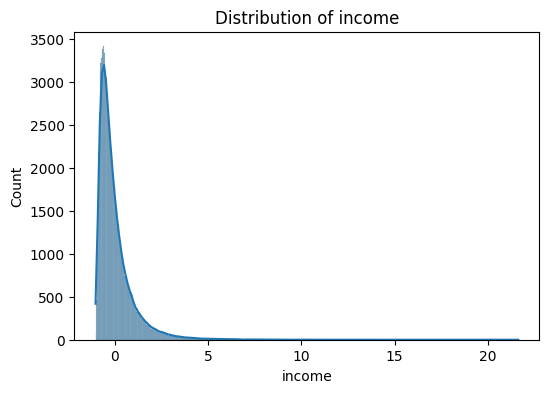

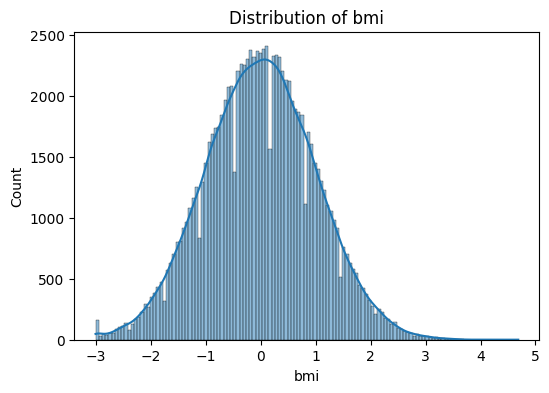

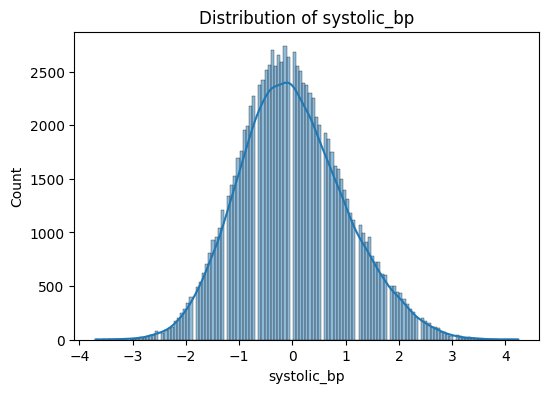

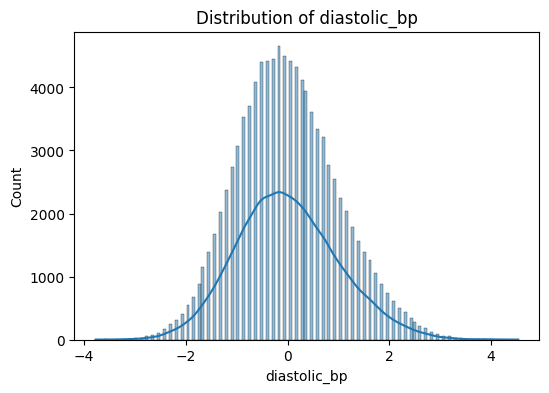

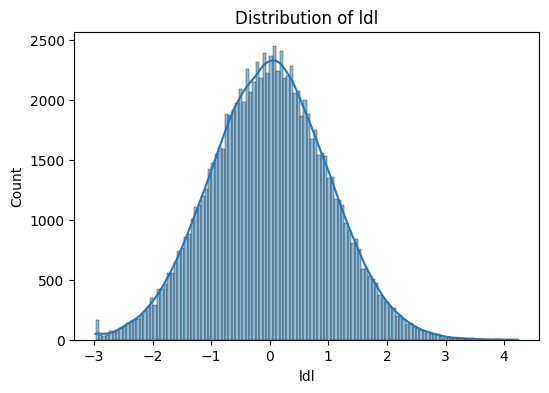

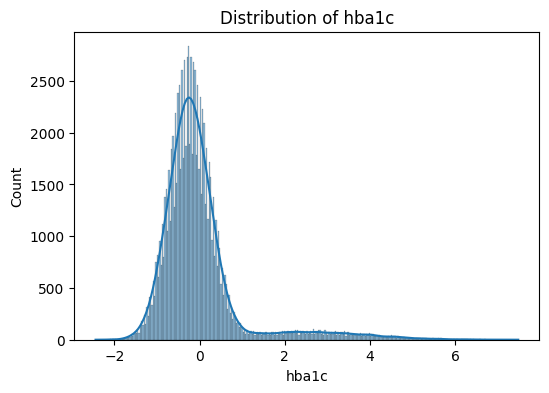

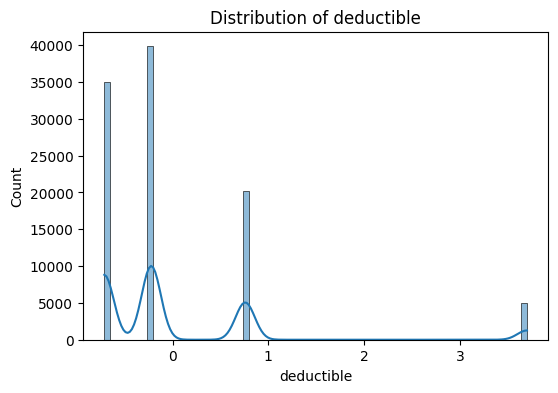

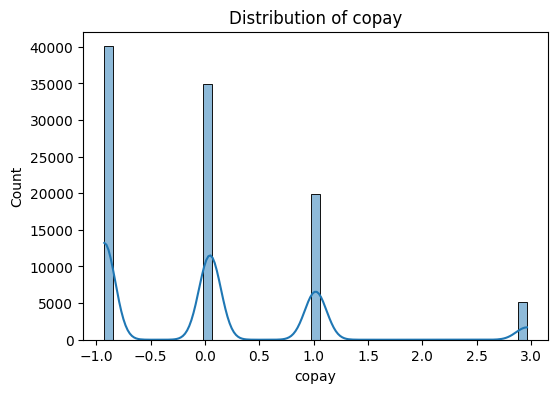

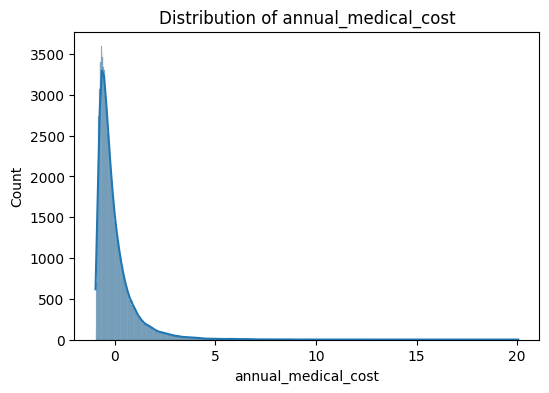

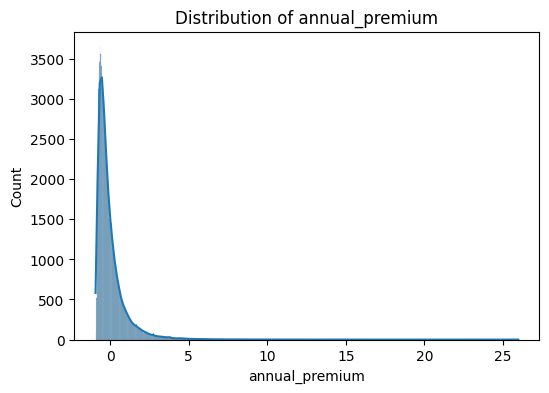

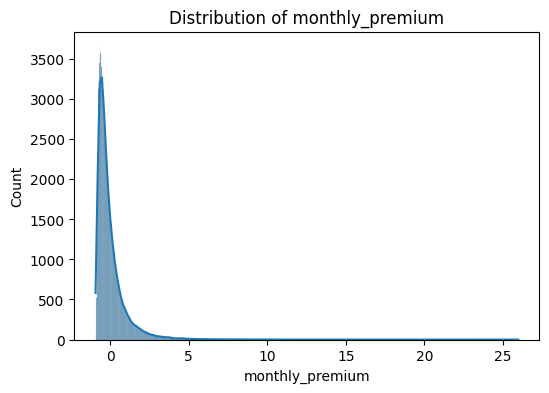

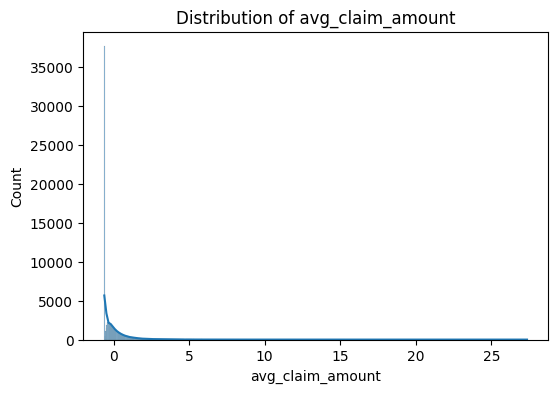

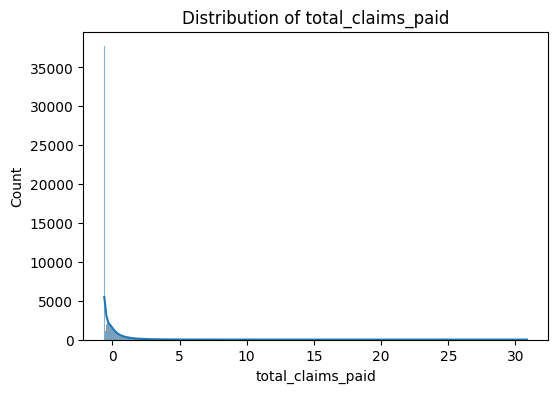

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in scale_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

is_high_risk                   1.000000
chronic_count                  0.561624
age                            0.559152
systolic_bp                    0.442861
diastolic_bp                   0.308214
claims_count                   0.265279
visits_last_year               0.265066
total_claims_paid              0.256373
annual_medical_cost            0.251923
annual_premium                 0.244012
monthly_premium                0.244011
medication_count               0.224396
avg_claim_amount               0.163999
hba1c                          0.158847
proc_surgery_count             0.141824
had_major_procedure            0.096365
proc_imaging_count             0.092100
proc_lab_count                 0.089377
proc_consult_count             0.086992
proc_physio_count              0.085812
bmi                            0.085079
ldl                            0.066655
hospitalizations_last_3yrs     0.032437
days_hospitalized_last_3yrs    0.030538
network_tier                   0.005502


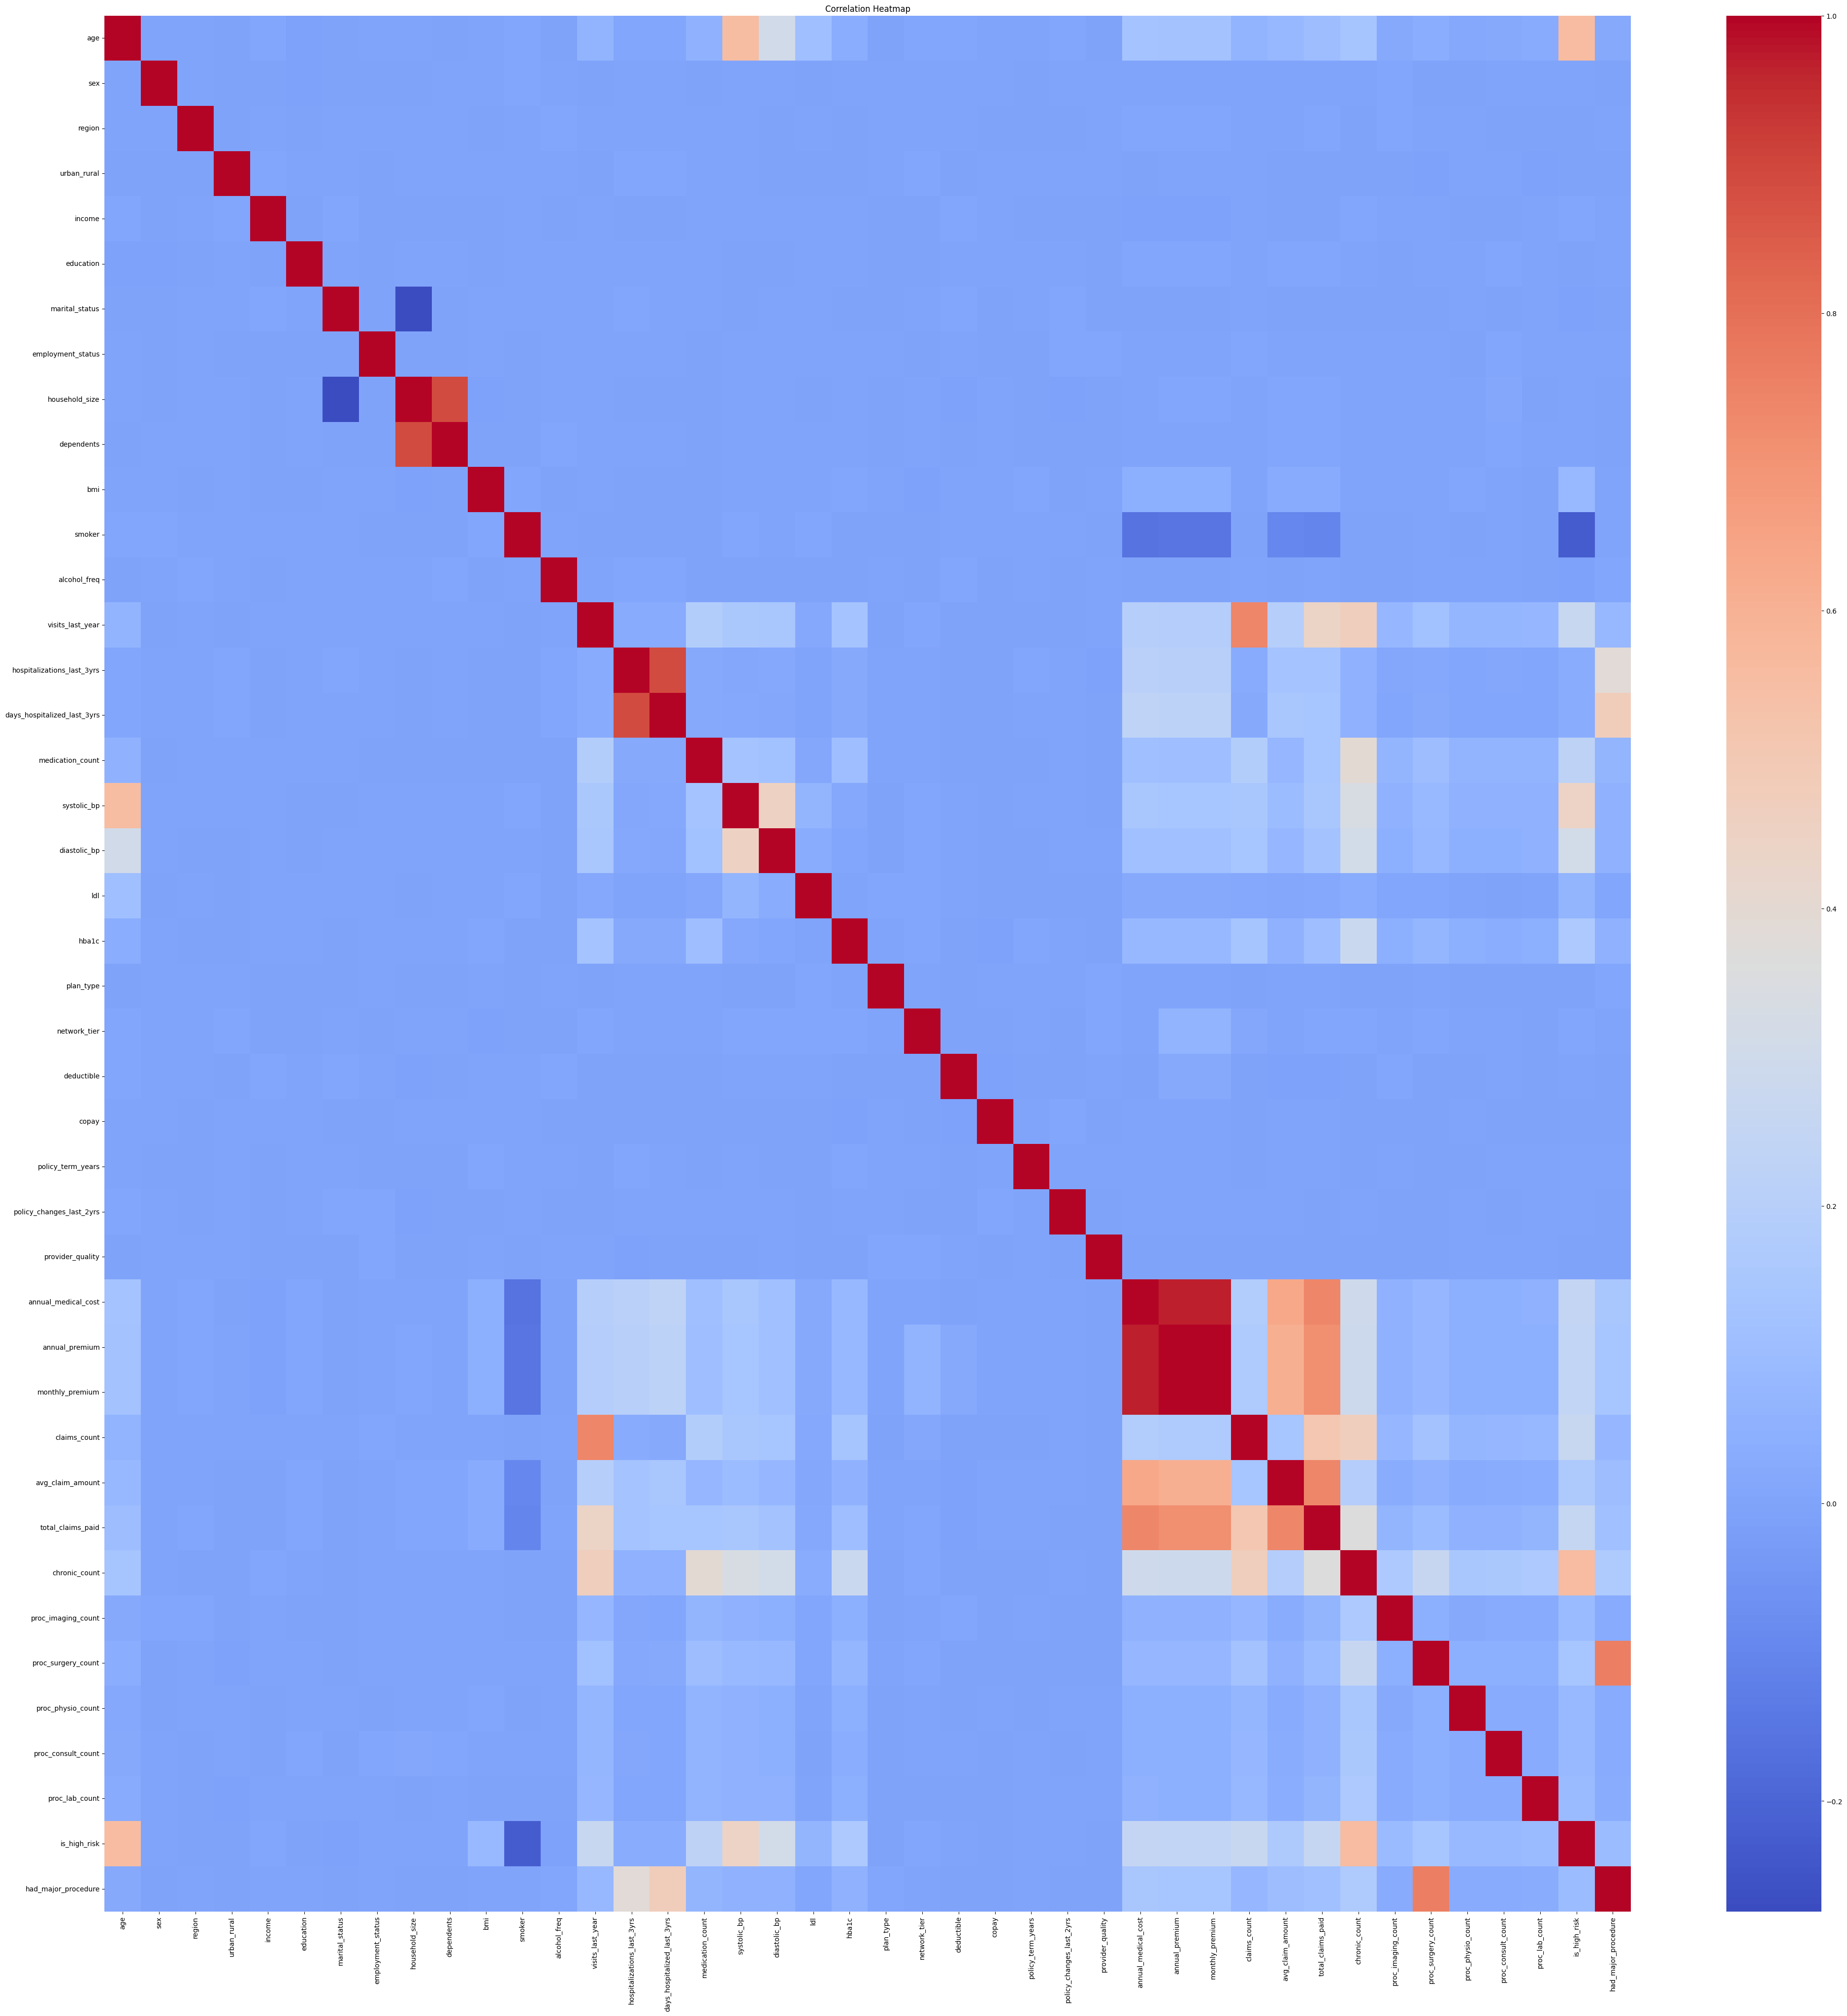

In [33]:
# # Convert target into bool type
# df["is_high_risk"] = df["is_high_risk"].astype(bool)

# Categorical features:
correlation_matrix = df.corr()
target_corr = correlation_matrix['is_high_risk'].sort_values(ascending=False)

pd.set_option('display.max_rows', 100)
print(target_corr)

# Visualize as a heatmap:

plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Let's try with the simple logistic classification first

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

y = df['is_high_risk']
X = df.drop(columns=['is_high_risk'])

print(y.value_counts(normalize=True))

is_high_risk
0    0.63219
1    0.36781
Name: proportion, dtype: float64


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)

In [36]:
### Try with a top 5 corr features (+/-)
# chronic_count                  0.561624
# age                            0.559152
# systolic_bp                    0.442861
# diastolic_bp                   0.308214
# claims_count                   0.265279
# region                        -0.002108
# plan_type                     -0.004327
# alcohol_freq                  -0.005677
# marital_status                -0.005731
# smoker                        -0.229334
selected_features = ["chronic_count", "age", "systolic_bp", "diastolic_bp", "claims_count", "region", "plan_type",
                    "alcohol_freq", "marital_status", "smoker"]

In [37]:
import statsmodels.api as sm

for df in [X_train, X_test]:
    for col in df.select_dtypes(include='bool').columns:
        df[col] = df[col].astype(int)

X_train_sm = sm.add_constant(X_train[selected_features])
X_test_sm = sm.add_constant(X_test[selected_features])

y_train_sm = y_train.astype(int)
y_test_sm = y_test.astype(int)

model_sm = sm.Logit(y_train_sm, X_train_sm)
model = model_sm.fit()

print(model.summary())
y_proba = model.predict(X_test_sm)
y_pred = (y_proba >= 0.5).astype(int)

Optimization terminated successfully.
         Current function value: 0.153377
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:           is_high_risk   No. Observations:                80000
Model:                          Logit   Df Residuals:                    79989
Method:                           MLE   Df Model:                           10
Date:                Wed, 15 Oct 2025   Pseudo R-squ.:                  0.7668
Time:                        16:51:29   Log-Likelihood:                -12270.
converged:                       True   LL-Null:                       -52622.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1341      0.072    -15.763      0.000      -1.275      -0.993
chronic_count   

Accuracy: 0.9371
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     12644
           1       0.92      0.91      0.91      7356

    accuracy                           0.94     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.94      0.94      0.94     20000



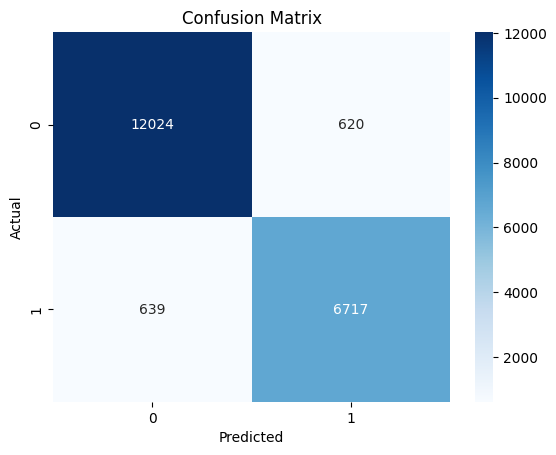

ROC AUC: 0.9847


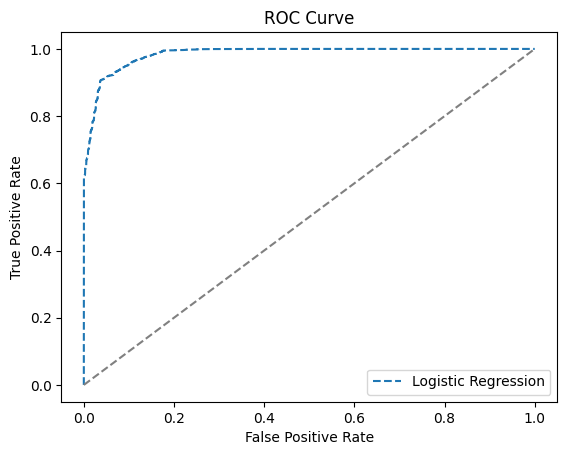

In [38]:
def show_report(y_true, y_hat, y_prob):
    print(f"Accuracy: {accuracy_score(y_true, y_hat):.4f}")
    print(classification_report(y_true, y_hat))
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    cm = confusion_matrix(y_true, y_hat)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    print(f"ROC AUC: {roc_auc_score(y_true, y_prob):.4f}")
    
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    
    plt.plot(fpr, tpr, linestyle='--', label='Logistic Regression')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

show_report(y_test_sm, y_pred, y_proba)

In [40]:
# Increase selected features to 10(+/-)
target_corr = target_corr.drop(['is_high_risk'])
top_positive = target_corr.head(10)
top_negative = target_corr.tail(10)
selected_features = list(top_positive.index) + list(top_negative.index)
print(selected_features)

['chronic_count', 'age', 'systolic_bp', 'diastolic_bp', 'claims_count', 'visits_last_year', 'total_claims_paid', 'annual_medical_cost', 'annual_premium', 'monthly_premium', 'policy_term_years', 'provider_quality', 'education', 'copay', 'urban_rural', 'region', 'plan_type', 'alcohol_freq', 'marital_status', 'smoker']


         Current function value: 0.153636
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           is_high_risk   No. Observations:                80000
Model:                          Logit   Df Residuals:                    79979
Method:                           MLE   Df Model:                           20
Date:                Wed, 15 Oct 2025   Pseudo R-squ.:                  0.7664
Time:                        16:52:06   Log-Likelihood:                -12291.
converged:                      False   LL-Null:                       -52622.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.1693      0.133     -8.778      0.000      -1.430      -0.908
chronic_count           5.5030      0.

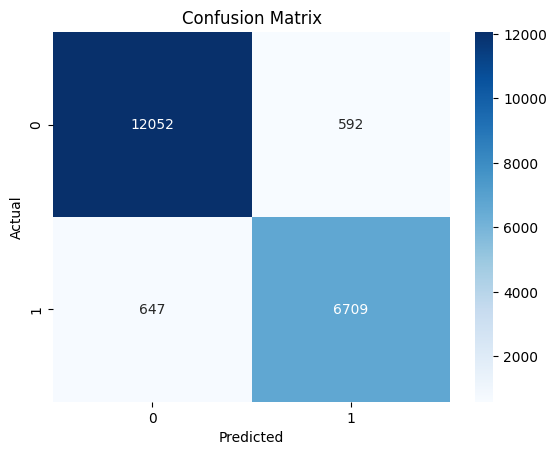

ROC AUC: 0.9847


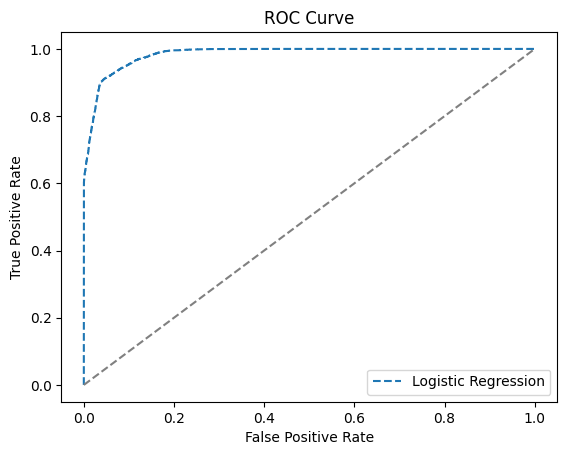

In [41]:
X_train_sm = sm.add_constant(X_train[selected_features])
X_test_sm = sm.add_constant(X_test[selected_features])

y_train_sm = y_train.astype(int)
y_test_sm = y_test.astype(int)

model_sm = sm.Logit(y_train_sm, X_train_sm)
model = model_sm.fit()

print(model.summary())
y_proba = model.predict(X_test_sm)
y_pred = (y_proba >= 0.5).astype(int)
show_report(y_test_sm, y_pred, y_proba)

In [ ]:
# chronic_conditions         4.3416    2.3e+14   1.89e-14      1.000    -4.5e+14     4.5e+14
# chronic_count              4.3416    2.3e+14   1.89e-14      1.000    -4.5e+14     4.5e+14
# age                        7.7452      0.113     68.671      0.000       7.524       7.966
# systolic_bp               -0.0030      0.027     -0.114      0.909      -0.055       0.049
# diastolic_bp               0.0278      0.023      1.211      0.226      -0.017       0.073
# claims_count               0.0334      0.020      1.683      0.092      -0.005       0.072
# visits_last_year          -0.0157        nan        nan        nan         nan         nan
# total_claims_paid         -0.0214      0.041     -0.520      0.603      -0.102       0.059
# annual_medical_cost       -0.0368      0.077     -0.480      0.631      -0.187       0.114
# annual_premium             0.1034      0.071      1.453      0.146      -0.036       0.243
# region_North              -0.0507      0.054     -0.941      0.347      -0.156       0.055
# region_South              -0.0234      0.049     -0.473      0.636      -0.120       0.073
# marital_status_Widowed    -0.0723      0.106     -0.681      0.496      -0.281       0.136
# marital_status_Single     -0.0205      0.043     -0.472      0.637      -0.106       0.065
# network_tier_Gold         -0.1078      0.052     -2.088      0.037      -0.209      -0.007
# education_Doctorate       -0.0201      0.118     -0.170      0.865      -0.252       0.212
# education_Some College     0.0184      0.047      0.388      0.698      -0.075       0.111
# alcohol_freq_unknown      -0.0329      0.045     -0.728      0.467      -0.121       0.056
# smoker_Former            -12.0894      0.159    -76.099      0.000     -12.401     -11.778
# smoker_Never             -12.1318      0.155    -78.122      0.000     -12.436     -11.827


         Current function value: 6.868670
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           is_high_risk   No. Observations:                80000
Model:                          Logit   Df Residuals:                    79958
Method:                           MLE   Df Model:                           41
Date:                Wed, 15 Oct 2025   Pseudo R-squ.:                  -9.442
Time:                        16:53:51   Log-Likelihood:            -5.4949e+05
converged:                      False   LL-Null:                       -52622.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -64.3995      4.527    -14.224      0.000     -73.273     -55.526
age           

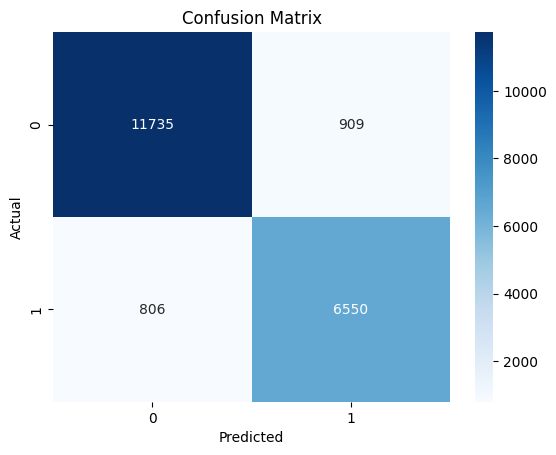

ROC AUC: 0.9610


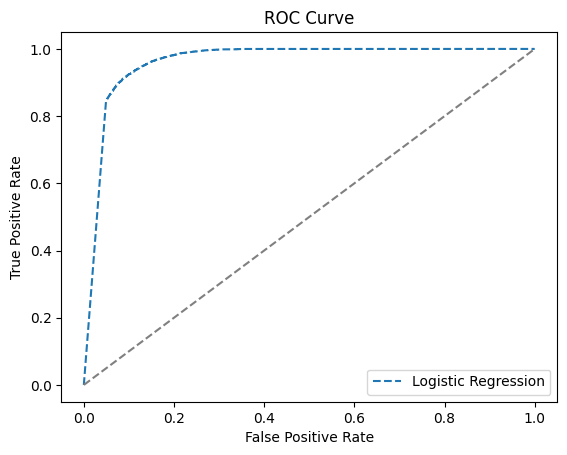

In [42]:
X_train_sm = sm.add_constant(X_train) 
X_test_sm = sm.add_constant(X_test)

y_train_sm = y_train.astype(int)
y_test_sm = y_test.astype(int)

model_sm = sm.Logit(y_train_sm, X_train_sm)
model = model_sm.fit()

print(model.summary())
y_proba = model.predict(X_test_sm)
y_pred = (y_proba >= 0.5).astype(int)

show_report(y_test, y_pred, y_proba)


['age', 'sex', 'region', 'urban_rural', 'income', 'education', 'employment_status', 'household_size', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year', 'systolic_bp', 'diastolic_bp', 'hba1c', 'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years', 'provider_quality', 'annual_premium', 'monthly_premium', 'claims_count', 'avg_claim_amount', 'total_claims_paid', 'chronic_count', 'proc_imaging_count', 'proc_surgery_count', 'proc_consult_count', 'proc_lab_count', 'had_major_procedure'] 32
         Current function value: 6.669826
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           is_high_risk   No. Observations:                80000
Model:                          Logit   Df Residuals:                    79967
Method:                           MLE   Df Model:                           32
Date:                Wed, 15 Oct 2025   Pseudo R-squ.:                  -9.140
Time:                        1

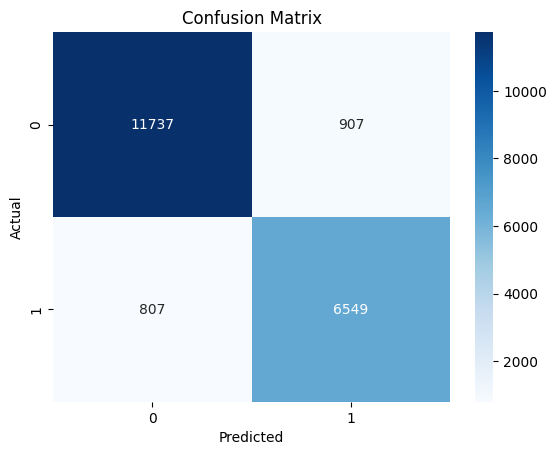

ROC AUC: 0.9612


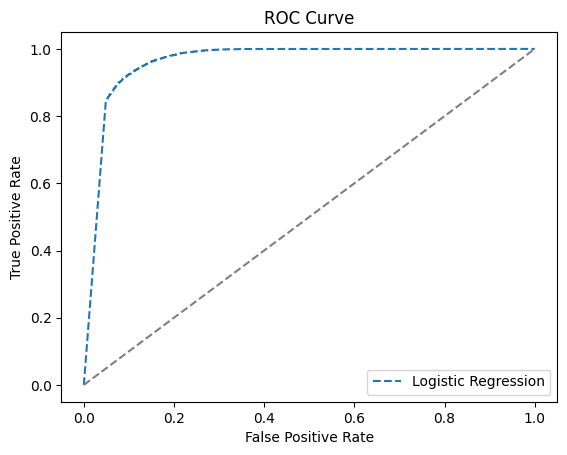

In [43]:
significant_vars = model.pvalues[model.pvalues < 0.05].index.tolist()
significant_vars = [col for col in significant_vars if col != 'const']
print(significant_vars, len(significant_vars))

X_train_sm = sm.add_constant(X_train[significant_vars])
X_test_sm = sm.add_constant(X_test[significant_vars])

y_train_sm = y_train.astype(int)
y_test_sm = y_test.astype(int)

model_sm = sm.Logit(y_train_sm, X_train_sm)
model = model_sm.fit()

print(model.summary())
y_proba = model.predict(X_test_sm)
y_pred = (y_proba >= 0.5).astype(int)

show_report(y_test, y_pred, y_proba)

### With the simple logistic classification we have 2 results:
Model with significant_vars -- Accuracy 0.9143
Model with top 5 corr features possitive/negative - Accuracy 0.9371 (0.9381 for top 10)  

- RandomForest
- Gradient Boosting

Accuracy: 0.9762
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     12644
           1       0.99      0.94      0.97      7356

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



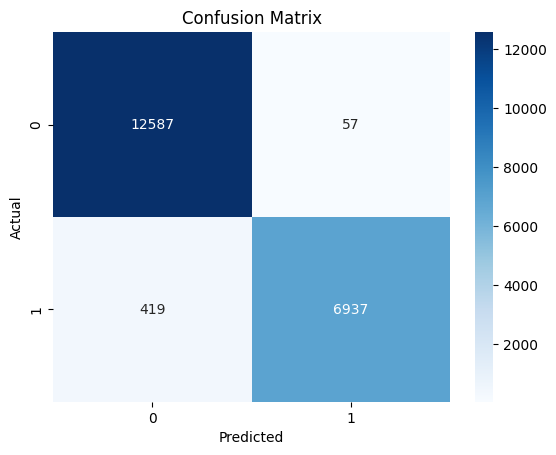

ROC AUC: 0.9988


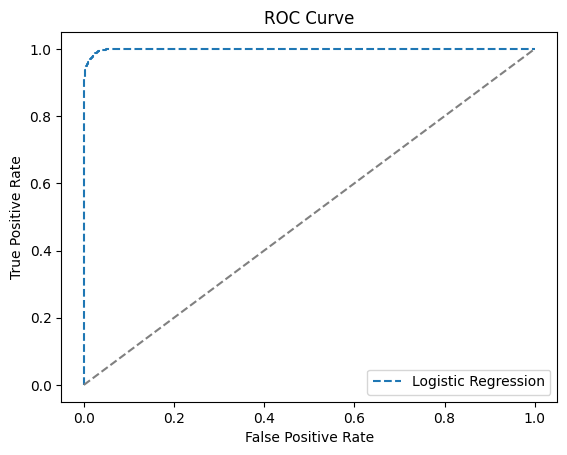

In [44]:
# Let's try with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
show_report(y_test, y_pred, y_proba)

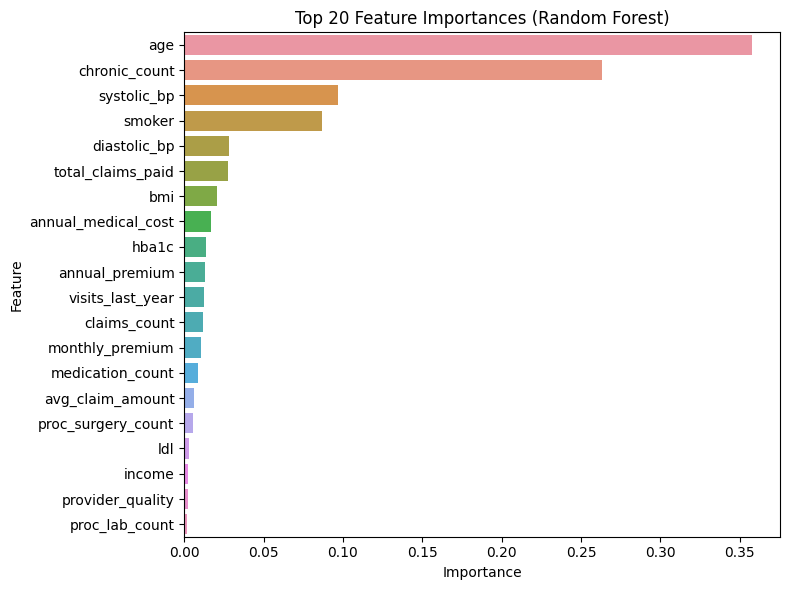

In [45]:
import pandas as pd

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(20)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [47]:
# Tuning hyperparameters using GridSearchCV or RandomizedSearchCV
# GridSearchCV – tries all possible combinations (exhaustive, slow).
# RandomizedSearchCV – tries random combinations (faster, good for large search spaces).

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500), # number of trees
    'max_depth': randint(4, 20), # depth of trees
    'min_samples_split': randint(2, 20), # min samples to split a node
    'min_samples_leaf': randint(1, 20), # min samples in a leaf
    'max_features': ['sqrt', 'log2', None], # number of features to consider
    'bootstrap': [True, False] # use bootstrap samples
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50, # number of random combinations to try
    cv=3, # 3-fold cross-validation
    verbose=2,
    scoring='roc_auc', # or 'accuracy'
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best Hyperparameters:")
print(random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=15, min_samples_split=12, n_estimators=171; total time=  18.7s
[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=15, min_samples_split=12, n_estimators=171; total time=  18.8s
[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=15, min_samples_split=12, n_estimators=171; total time=  18.8s
[CV] END bootstrap=True, max_depth=8, max_features=None, min_samples_leaf=19, min_samples_split=12, n_estimators=187; total time= 1.1min
[CV] END bootstrap=True, max_depth=8, max_features=None, min_samples_leaf=19, min_samples_split=12, n_estimators=187; total time= 1.1min
[CV] END bootstrap=True, max_depth=8, max_features=None, min_samples_leaf=19, min_samples_split=12, n_estimators=187; total time= 1.1min
[CV] END bootstrap=True, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=13, n_estimators=393;

Accuracy: 0.9999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12644
           1       1.00      1.00      1.00      7356

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



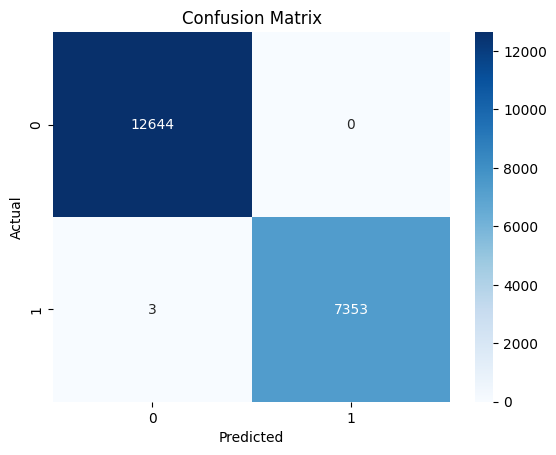

ROC AUC: 1.0000


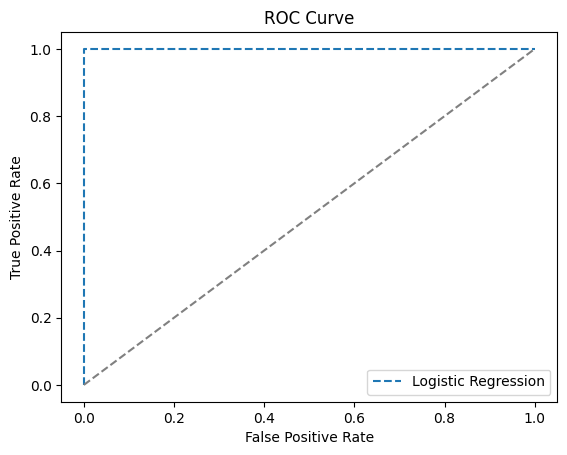

In [48]:
# {'bootstrap': True, 'max_depth': 18, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 14, 'n_estimators': 278}
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
show_report(y_test, y_pred, y_proba)

In [ ]:
# It's too good to be true. It may overfitting or leak the target in the training data.

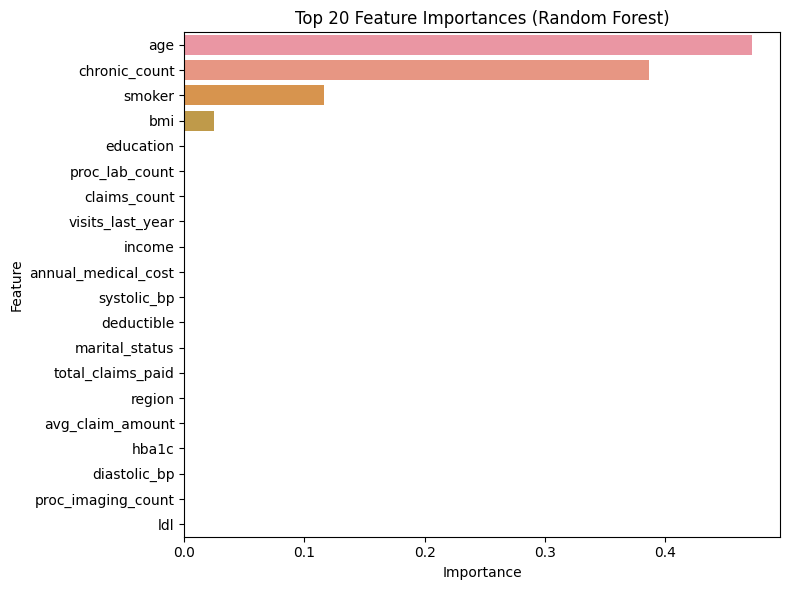

In [50]:
# Detect feature importances

import pandas as pd

feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(20)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
# It's look fine so maybe the model is overfitting

Train Accuracy: 0.9982833333333333
Test Accuracy: 0.991475
Accuracy: 0.9915
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     25288
           1       0.99      0.99      0.99     14712

    accuracy                           0.99     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       0.99      0.99      0.99     40000



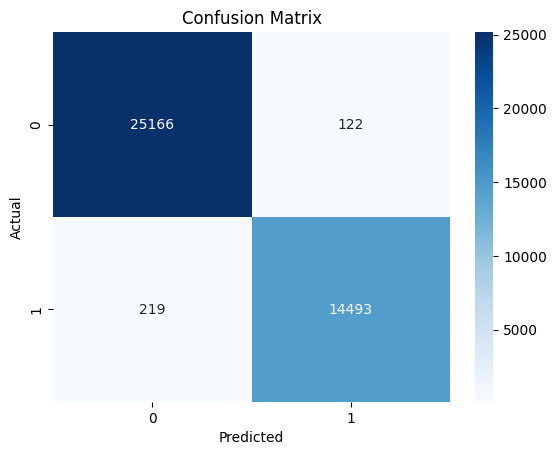

ROC AUC: 0.9997


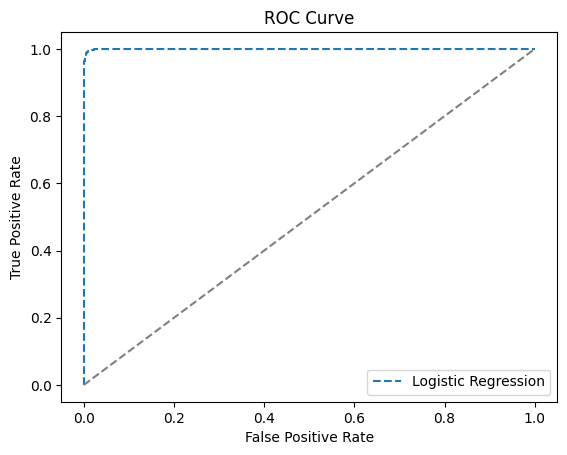

In [59]:
# {'bootstrap': True, 'max_depth': 18, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 14, 'n_estimators': 278}

model = RandomForestClassifier(
    n_estimators=278,
    max_depth=18,
    random_state=42,
    n_jobs=-1,
    min_samples_leaf=10,
    min_samples_split=14,
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
show_report(y_test, y_pred, y_proba)

In [ ]:
# Training and Testing score quite the same so it may not overfitting. Let's do some verify steps for that.

In [54]:
# Try with another training/testing data => change test_size and random_state
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.4, random_state=20, stratify=y
)

In [56]:
model = RandomForestClassifier(
    n_estimators=278,
    max_depth=18,
    random_state=42,
    n_jobs=-1,
    min_samples_leaf=10,
    min_samples_split=14,
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.9982833333333333
Test Accuracy: 0.991475


In [60]:
# Try with 5 CV to make sure it's not overfitting.

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, roc_auc_score

model = RandomForestClassifier(
    n_estimators=278,
    max_depth=18,
    random_state=42,
    n_jobs=-1,
    min_samples_leaf=10,
    min_samples_split=14,
)

acc_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("Cross-Validated Accuracy Scores:", acc_scores)
print("Mean Accuracy:", acc_scores.mean())


Cross-Validated Accuracy Scores: [0.9947 0.9944 0.9949 0.9912 0.9947 0.9939 0.9947 0.9947 0.9944 0.9948]
Mean Accuracy: 0.9942399999999999


So finally, we have a RandomForestClassifier model with train accuracy ~ 100% and the Cross-Validated Accuracy 99%